In [14]:
# Libraries
from waveome.model_search import GPKernelSearch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [15]:
#pip install tensorflow

In [16]:
#pip install tensorflow_probability

In [17]:
#pip install gpflow

In [18]:
metadata = pd.read_csv(r"C:\Users\ASUS\Box\Waveome\data\Marine_microbiome\metadata.csv")
microbiome = pd.read_csv(r"C:\Users\ASUS\Box\Waveome\data\Marine_microbiome\microbiome.csv")

df = pd.DataFrame(
    {
        'sample_id': metadata['Sample_Id'],
        'sample_name': metadata['Sample_name'],
        'depth' : metadata['depth_(m)'],
        'time': metadata['Time'],
        'chemistry': metadata['chemistry'],
        'outcome1': microbiome['Abiotrophia_defectiva_ATCC_49176'],
        'outcome2': microbiome['Acanthamoeba_castellanii'],
        'outcome3': microbiome['Acanthamoeba_polyphaga_mimivirus']
    }
).sort_values(['sample_id', 'time'])

print(f'Dimension of dataset: {df.shape}')

df.head()

Dimension of dataset: (42, 8)


,sample_id,sample_name,depth,time,chemistry,outcome1,outcome2,outcome3
0,1,HOT194_25m,25,0,flex,12,0,39
1,2,HOT195_25m,25,30,flex,7,1,51
2,3,HOT196_25m,25,57,flex,6,0,15
3,4,HOT197_25m,25,117,flex,10,0,54
4,5,HOT198_25m,25,136,flex,4,0,27


In [19]:
column_names = df.columns.tolist()
print(column_names[5:8])

['outcome1', 'outcome2', 'outcome3']


In [20]:
x = (df.loc[:, 'time'])

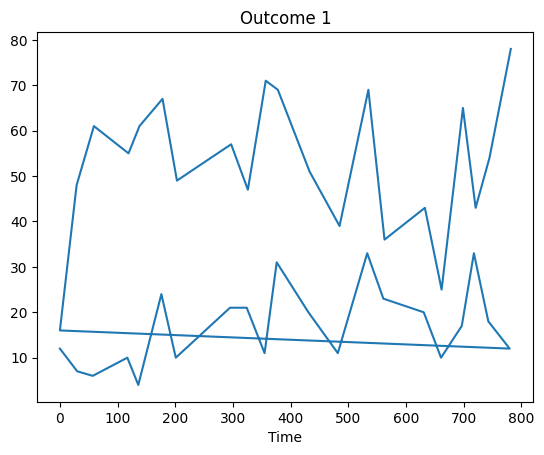

<Figure size 720x360 with 0 Axes>

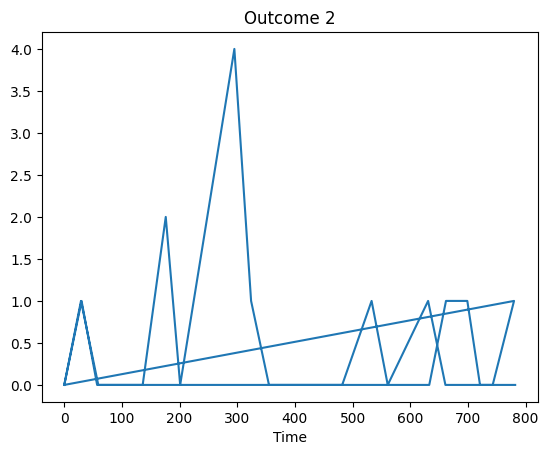

<Figure size 720x360 with 0 Axes>

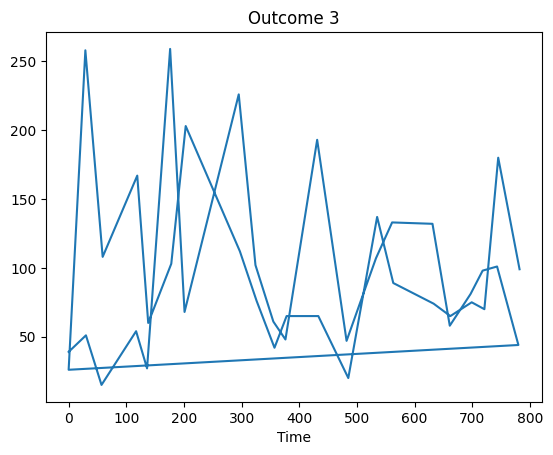

<Figure size 720x360 with 0 Axes>

In [21]:
for out in range(1,4):
    plt.plot(df.loc[:, 'time'], df.loc[:, 'outcome'+str(out)])
    plt.title(f'Outcome {out}')
    plt.xlabel('Time')
    plt.figure(figsize=(7.2,3.6))
    plt.show()

In [22]:
# Factorize categorical columns
df["sample_id"], subject_vals = pd.factorize(df["sample_id"])
df["depth"], subject_vals = pd.factorize(df["depth"])
df["chemistry"], chemistry = pd.factorize(df["chemistry"])
df[["sample_id", "depth", "time", "chemistry"]] = df[["sample_id", "depth", "time", "chemistry"]].astype(float)

In [23]:
X = df[['sample_id', 'depth', 'time', 'chemistry']]
X.head()

,sample_id,depth,time,chemistry
0,0.0,0.0,0.0,0.0
1,1.0,0.0,30.0,0.0
2,2.0,0.0,57.0,0.0
3,3.0,0.0,117.0,0.0
4,4.0,0.0,136.0,0.0


In [24]:
df[column_names[5:8]] = df[column_names[5:8]].astype(float)
Y = df[column_names[5:8]]
Y.head()

,outcome1,outcome2,outcome3
0,12.0,0.0,39.0
1,7.0,1.0,51.0
2,6.0,0.0,15.0
3,10.0,0.0,54.0
4,4.0,0.0,27.0


In [25]:
# Load the information into the Gaussian process search object
gps = GPKernelSearch(
    X=df[['sample_id','depth', 'time', 'chemistry']],
    Y=df[['outcome1', 'outcome2', 'outcome3']],
    unit_col= 'sample_id',
    categorical_vars=['depth', 'chemistry'],
    outcome_likelihood='gaussian'
)

In [26]:
gps.run_search(
    random_seed=9102
)

Kernel search: 100%|██████████| 3/3 [04:13<00:00, 84.63s/it]


In [27]:
gps.models["outcome1"]

{'models': {'categorical[1]+categorical[1]*categorical[3]': {'kernel': <gpflow.kernels.base.Sum object at 0x000001C256D9AC10>
╒════════════════════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                               │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │   value │
╞════════════════════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ Sum.kernels[0].variance            │ Parameter │ Softplus    │ Uniform │ True        │ ()      │ float64 │ 90.5896 │
├────────────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Sum.kernels[1].kernels[0].variance │ Parameter │ Softplus    │ Uniform │ False       │ ()      │ float64 │  1      │
├────────────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ Sum.kernels[1].kernels[1].variance │ Pa

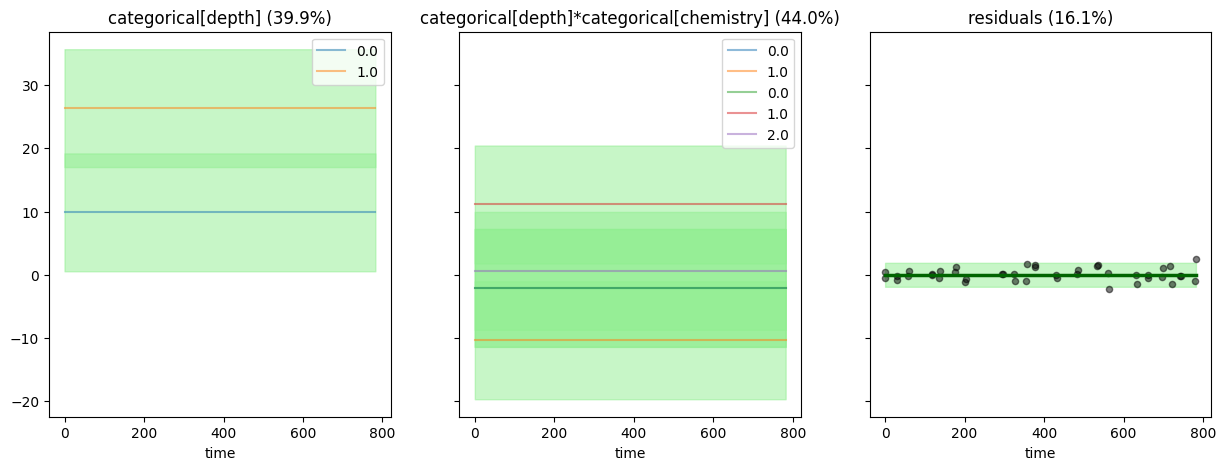

In [28]:
# Now after the search is finished we can inspect the
# additive components selected for each outcome
gps.plot_parts(
    out_label='outcome1',
    x_axis_label='time'
);

In [29]:
gps.plot_parts(
    out_label='outcome2',
    x_axis_label='time'
);

TypeError: 'slice' object is not subscriptable

In [ ]:
gps.plot_parts(
    out_label='outcome3',
    x_axis_label='time'
);

In [ ]:
# Plot some of the posterior mean functions for individuals in the dataset
# This is done with the unit_label argument
gps.plot_marginal(
    out_label='outcome2',
    x_axis_label='time',
    unit_label=0
)

gps.plot_marginal(
    out_label='outcome2',
    x_axis_label='time',
    unit_label=2
)

In [ ]:
gps.plot_heatmap(var_cutoff=0.1);